# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [70]:
import seaborn as sns
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
#y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
#columns = ['Age', 'Tardies']
#student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})

raw_data = {'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]}
student_data = pd.DataFrame(raw_data, columns = ['Age', 'Tardies'])
student_data


,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

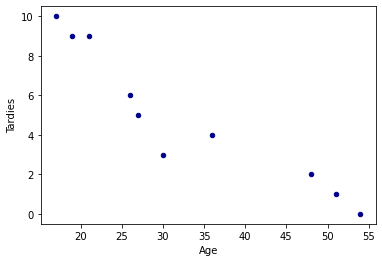

In [71]:
student_data.plot.scatter(x='Age', y='Tardies', c='DarkBlue')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
#The trend is the younger the students are the more tardies they have

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [72]:
correlation = student_data['Age'].corr(student_data['Tardies'])
print('A calculated correlation between age and tardies is', correlation)

student_data.cov()

#Correlation and Covariance, both measure the relationship and the dependency between two variables. 
#“Covariance” indicates the direction of the linear relationship between variables. 
#“Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables.

A calculated correlation between age and tardies is -0.9391626886887122


,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [73]:
from scipy import stats
X = student_data['Age']
Y = student_data['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: -0.2428207709159808
The intercept is: 12.888803363135768


In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(student_data['Age'].values.reshape(-1,1), student_data['Tardies'].values.reshape(-1.1))

TypeError: 'float' object cannot be interpreted as an integer

Plot your regression model on your scatter plot.

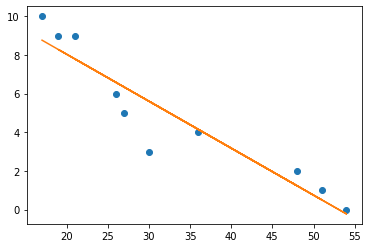

In [80]:
x = student_data['Age']
y = student_data['Tardies']

plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [7]:
#The linear regression line is a negative slope line that shows a negative correlation between the age and tardies
#The old a person is the less likely they will be arriving late. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [100]:
data = pd.read_csv('vehicles.csv') 
sel_data = data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
sel_data.head(20)

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
5,1997,4.0,14.982273,22,1500,403.954545
6,1997,4.0,13.733750,24,1400,370.291667
7,1997,6.0,16.480500,20,1650,444.350000
8,1998,4.0,14.982273,22,1500,403.954545
9,1998,4.0,13.733750,24,1400,370.291667


In [98]:
correlation = sel_data.corr(method ='pearson')
correlation

#There is a strong positive correlation between the CO2 Emissions  and Fuel Barrels/Year variable.
#The 'Year' variable provides the least amount of helpful information for determining CO2 emissions.

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [101]:
from scipy import stats
x = sel_data['CO2 Emission Grams/Mile']
y = sel_data['Fuel Barrels/Year']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 0.037002813068274715
The intercept is: 0.021013852496857055


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [105]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(sel_data['CO2 Emission Grams/Mile'].values.reshape(-1,1), sel_data['Fuel Barrels/Year'].values.reshape(-1,1))
intercept = model.intercept_
slope = model.coef_
print(intercept)
print(slope)

[0.02101385]
[[0.03700281]]


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [12]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [13]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [14]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [15]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [16]:
# Your response here. 